# EDA

Open file 
clean up 
Shape of record number of records 

spot outliers 

Feature To Feature Relationships


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [30]:
from gensim import utils
import gensim.parsing.preprocessing as gsp

filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def cclean_text(s):
    s = str(s)
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [42]:
df = pd.read_csv('Local Data/f_300.csv')

combined_features = df["title"] + ". " + df["body"] + ". " + df["comments"] 
df = df.assign(combined_features = combined_features)

print(df.head() )

                                               title              author  \
0  Different stages of hair loss in perfect order...  BreakingBrownBread   
1  Women gather together during Dust storm in Raj...          TheDosaMan   
2  Zoom in! I took over 600 shots of last night's...                vpsj   
3              A Wild Gaur, Nagarahole National Park         Coconut_Kid   
4          Everyone, Puffy the Superdog. (ZenFone 6)     bosama_in_laden   

                                   url body  score        flair  num  \
0  https://i.redd.it/ydbmwsa7jpt41.jpg  NaN   2802  Photography   88   
1  https://i.redd.it/uapdc9dvels41.png  NaN   3565  Photography   74   
2      https://i.imgur.com/RLL0xvH.jpg  NaN   1463  Photography   81   
3  https://i.redd.it/1zz6atjncds41.jpg  NaN    658  Photography   71   
4  https://i.redd.it/bk0fba8havt41.jpg  NaN    603  Photography   39   

                                            comments combined_features  
0   So, can I guess that you're as ba

In [43]:
print('5 random titles with Flairs as Photography: \n')
cl = df.loc[dff.flair == 'Photography', ['title']].sample(5).values
for c in cl:
    print(c[0])


5 random titles with Flairs as Photography: 

Lone House at Loktak Lake, Manipur [OC] [6000x4000]
Vibrant oranges; not so vibrant vendor. [3530x5670]
[OC] Pic taken in a resort in Ankola, near Gokarna - taken using an OP7 pro, unedited
Kolkata at night during Durga Pujo
Due to Less Pollution ... Noida is Visible [One+5T | 4608 × 2304]


In [52]:
df.dtypes


title                object
author               object
url                  object
body                 object
score                 int64
flair                object
num                   int64
comments             object
combined_features    object
dtype: object

AskIndia  =  243
Non-Political  =  245
Scheduled  =  250
Photography  =  242
Science/Technology  =  244
Politics  =  250
Business/Finance  =  244
Policy/Economy  =  246
Sports  =  216
Food  =  242

NaN in - 

title                   0
author                  0
url                     0
body                 1517
score                   0
flair                   0
num                     0
comments                4
combined_features    1517
dtype: int64


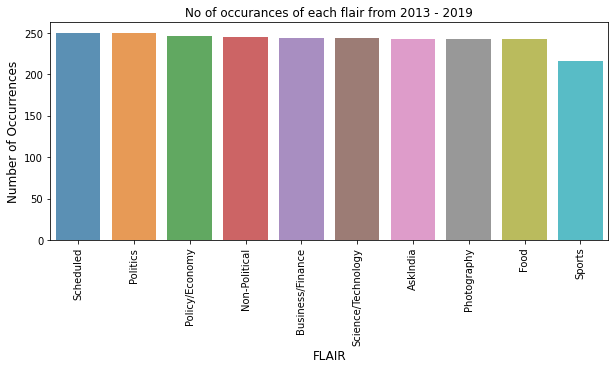

In [44]:
import seaborn as sns
cnt_pro = df['flair'].value_counts()

plt.figure(figsize=(10,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)

plt.title("No of occurances of each flair from 2013 - 2019")
plt.xticks(rotation=90)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('FLAIR', fontsize=12)


flairs = [ "AskIndia", "Non-Political","Scheduled", "Photography", "Science/Technology",
          "Politics", "Business/Finance", "Policy/Economy",
          "Sports", "Food"]

for i in flairs:
    print(i, " = " ,int(df.flair.str.count(i).sum()))


print("")   
print("NaN in - ")
print("")    
print(df.isna().sum())
# plt.savefig('images/1.png')


Text(0, 0.5, 'Number of posts')

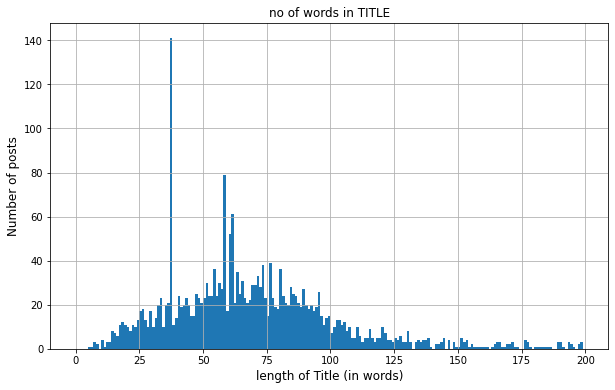

In [45]:
# distribution of no of words in title

temp = df.title.str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)

number with no body = 1517
number with body = 58156
means - most of them dont have a body


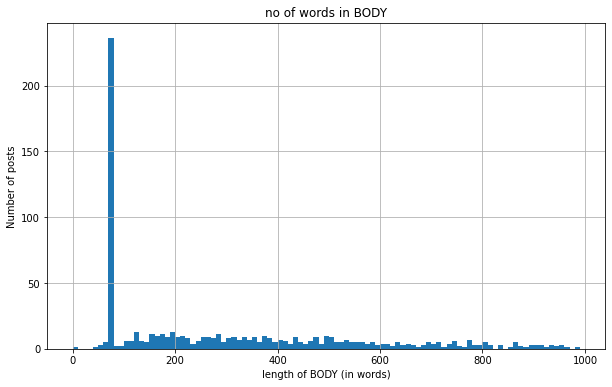

In [46]:
# distribution of no. of words in body
print("number with no body =",df['body'].isnull().sum())
print("number with body =",59673 - df['body'].isnull().sum())


temp = df.body.str.len()
temp.hist(bins = np.arange(0,1000,10))
plt.title("no of words in BODY")
plt.xlabel("length of BODY (in words)")
plt.ylabel("Number of posts")


print("means - most of them dont have a body")


among the one with body - most of them have words from 30 to 200


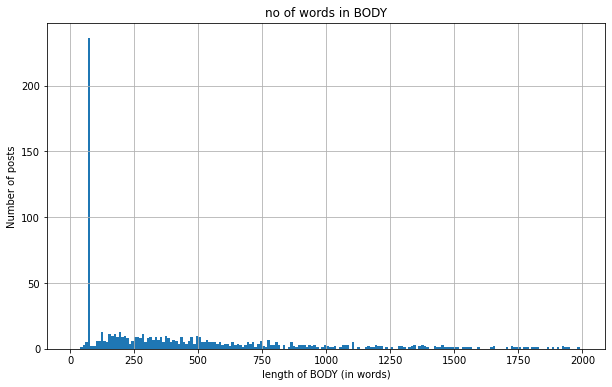

In [48]:
# distribution of no. of words in body 

temp = df.body.str.len()
temp.hist(bins = np.arange(10,2000,10))
plt.title("no of words in BODY")
plt.xlabel("length of BODY (in words)")
plt.ylabel("Number of posts")


print("among the one with body - most of them have words from 30 to 200")


Text(0, 0.5, 'Number of posts')

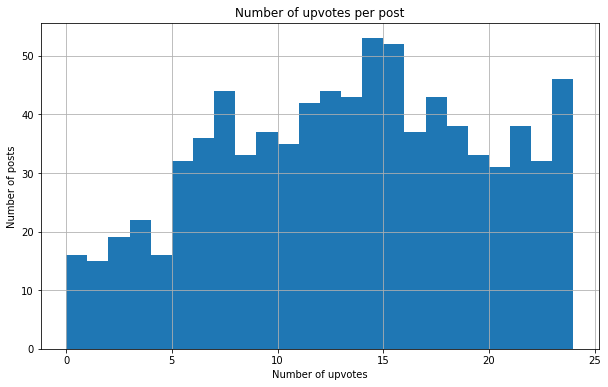

In [49]:
temp = df.score
temp.hist(bins = np.arange(0,25,1))
plt.title("Number of upvotes per post")
plt.xlabel("Number of upvotes")
plt.ylabel("Number of posts")


Text(0, 0.5, 'Number of posts')

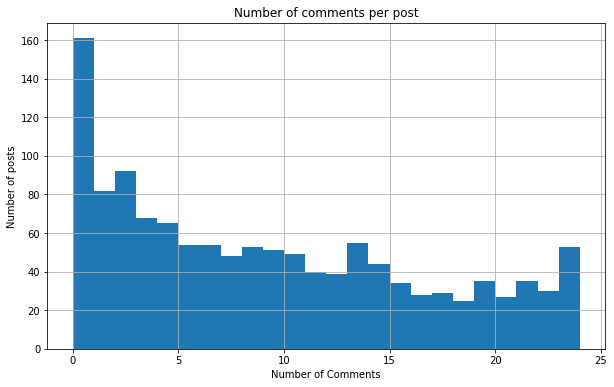

In [51]:
temp = df.num
temp.hist(bins = np.arange(0,25,1))


plt.title("Number of comments per post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of posts")

No handles with labels found to put in legend.


flair
AskIndia              AxesSubplot(0.125,0.125;0.775x0.755)
Business/Finance      AxesSubplot(0.125,0.125;0.775x0.755)
Food                  AxesSubplot(0.125,0.125;0.775x0.755)
Non-Political         AxesSubplot(0.125,0.125;0.775x0.755)
Photography           AxesSubplot(0.125,0.125;0.775x0.755)
Policy/Economy        AxesSubplot(0.125,0.125;0.775x0.755)
Politics              AxesSubplot(0.125,0.125;0.775x0.755)
Scheduled             AxesSubplot(0.125,0.125;0.775x0.755)
Science/Technology    AxesSubplot(0.125,0.125;0.775x0.755)
Sports                AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

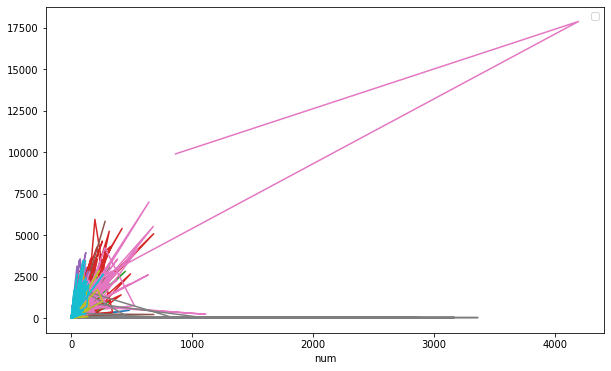

In [54]:
fig, ax = plt.subplots()
plt.legend()
df.groupby('flair').plot(x='num', y='score',  ax=ax, legend=False)


,score
flair,
AskIndia,69.448560
Business/Finance,111.536885
Food,223.491736
Non-Political,759.477551
Photography,392.227273
Policy/Economy,190.800813
Politics,826.256000
Scheduled,30.668000
Science/Technology,101.983607


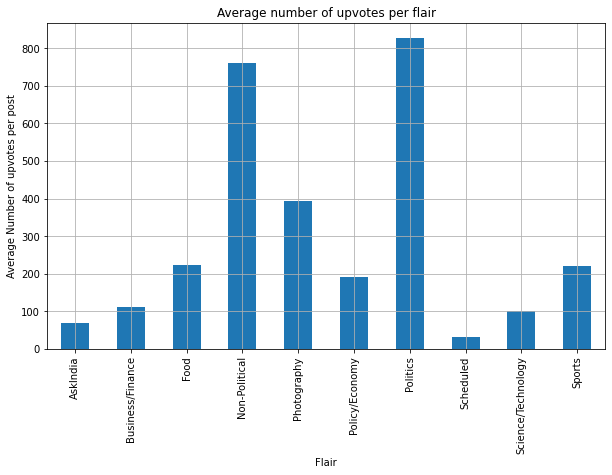

In [55]:
df2 = df.groupby("flair").mean()[['score']]

df2.plot(kind='bar', legend=False, grid=True)
plt.title("Average number of upvotes per flair")

plt.xlabel("Flair")
plt.ylabel("Average Number of upvotes per post")
#plt.savefig('images/10.png')

df2.head(10)


,num
flair,
AskIndia,40.465021
Business/Finance,19.930328
Food,38.743802
Non-Political,85.828571
Photography,21.644628
Policy/Economy,31.597561
Politics,121.728000
Scheduled,1147.932000
Science/Technology,18.819672


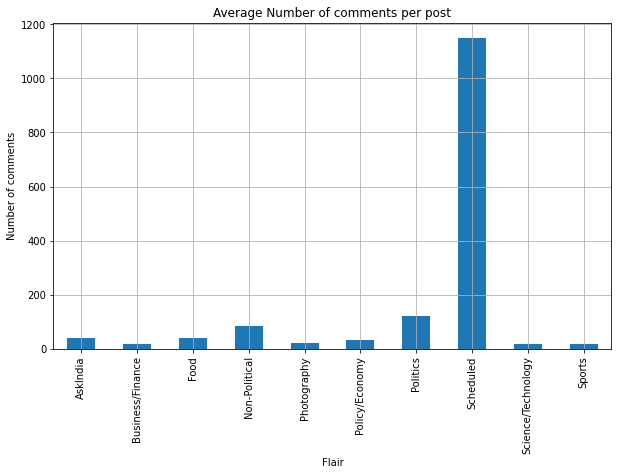

In [57]:
df3 = df.groupby("flair").mean()[['num']]

df3.plot(kind='bar', legend=False, grid=True)
plt.title("Average Number of comments per post")

plt.xlabel("Flair")
plt.ylabel("Number of comments")


df3.head(10)


In [58]:
df.body.fillna(" ",inplace=True)


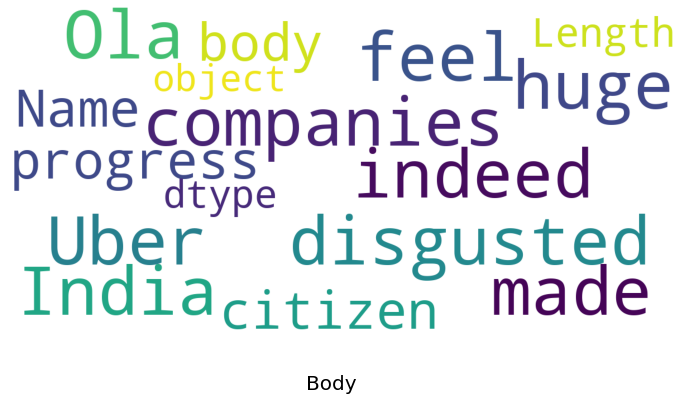

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.body,"Body")


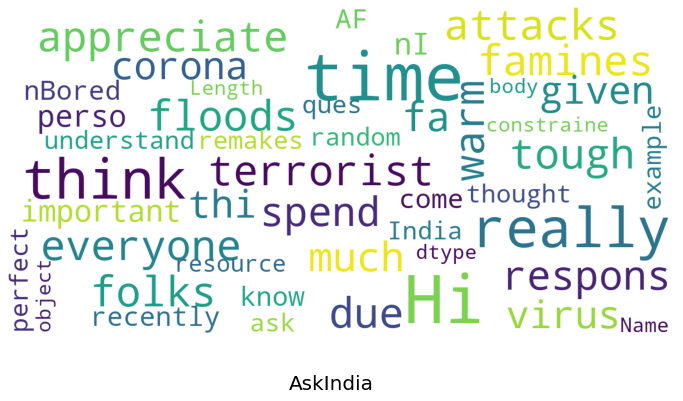

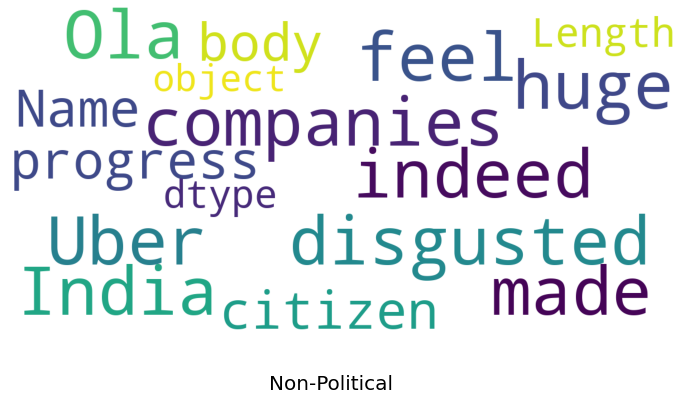

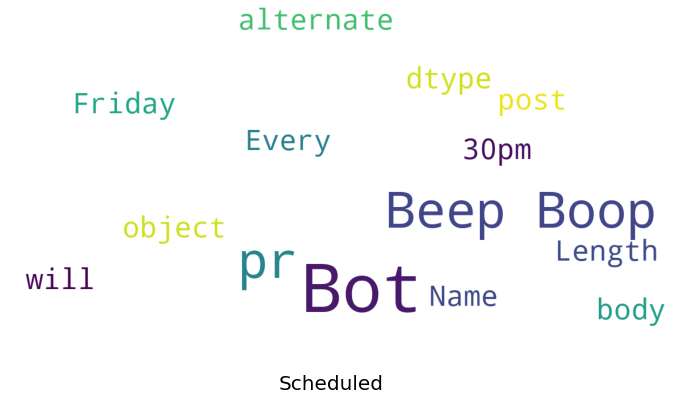

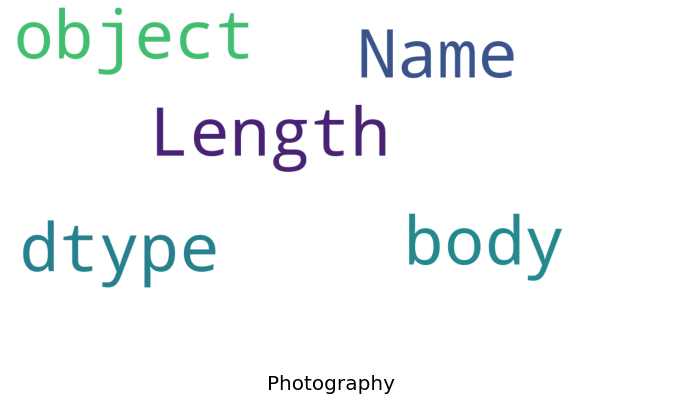

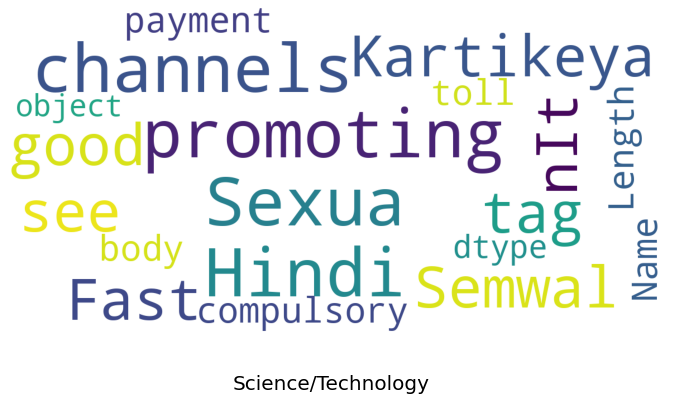

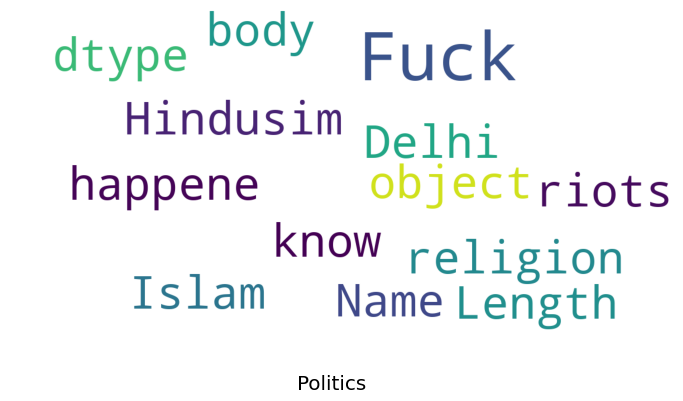

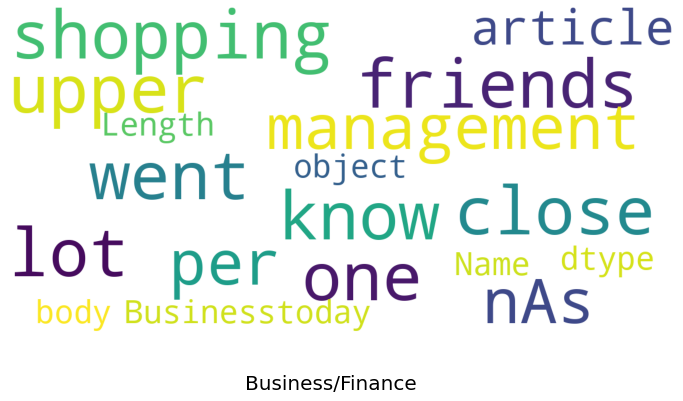

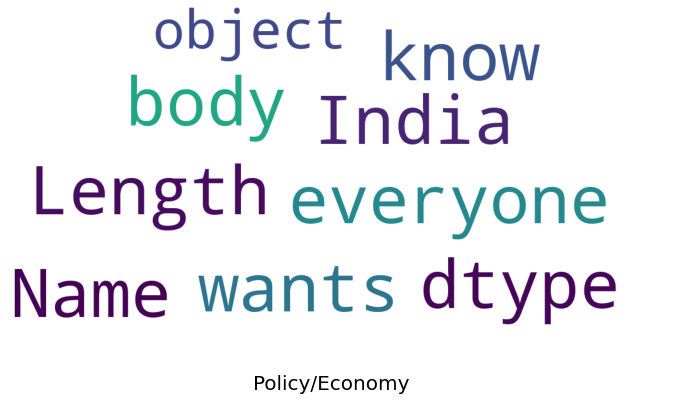

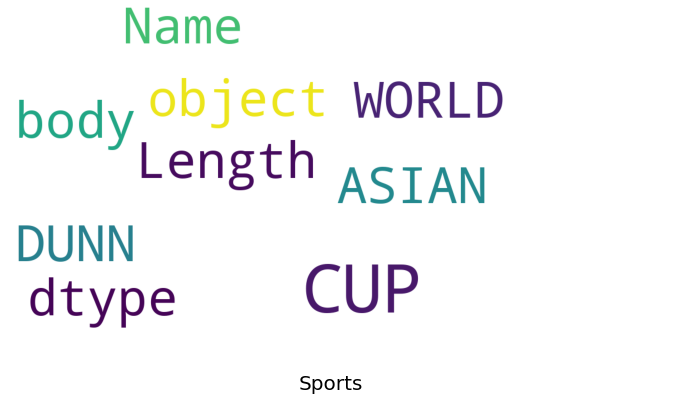

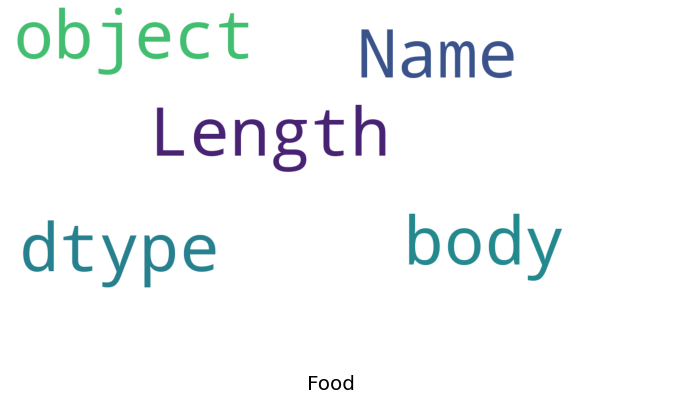

In [61]:
for flair in flairs:
    show_wordcloud(df[df['flair'] == flair]['body'],flair)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

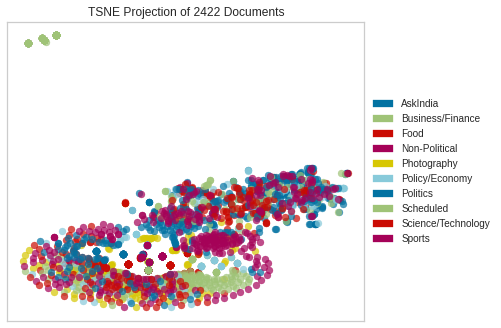

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

# Load the data and create document vectors
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.body)
y = df.flair

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

In [73]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['title'], 20)
for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

india 457
thread 249
discussion 243
random 237
indian 176
2020 142
daily 128
night 126
09 125
15am 120
late 117
lockdown 109
19 86
coronavirus 86
covid 84
world 64
oc 59
says 58
delhi 58
rs 58
